we are considering a squire of 2 unit of sides and there is a circle at the center of the circle. Consider center of the circle is on origin.

In [1]:
import numpy as np
import math as mt
from matplotlib import pyplot as plt
import random
from random import seed
from random import randint
import pandas as pd

# seed random number generator
seed(1)

In /home/sifat/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/sifat/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/sifat/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/sifat/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/sifat/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylel

In [41]:
area_of_squere=0
area_of_circle =0
history=[]
value_pi=0
for i in range(100000):
    x = random.uniform(-1 ,1)
    y = random.uniform(-1 ,1)
    radius = x**2 + y**2
    if radius <= 1:
        area_of_circle+=1
    
    area_of_squere+=1
    value_pi = 4*(area_of_circle/area_of_squere)
    history.append(value_pi)

print(value_pi)
        

3.13944


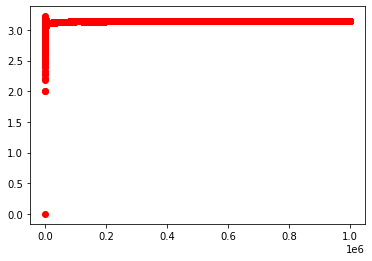

In [8]:

x_plt = [i for i in range(1000**2)]
plt.scatter(x_plt, history, color='r')
plt.show()

In [4]:
df=pd.DataFrame({'CusId': [1,2,3,4,5,6,7,8,9,10],'TBA': [0,1,2,3,4,5,6,0,0,0],'prob':[0.0,.10,.15,.25,.30,.10,.10,0.00,0.00,0.00]})


In [5]:
df.head(10)

,CusId,TBA,prob
0,1,0,0.00
1,2,1,0.10
2,3,2,0.15
3,4,3,0.25
4,5,4,0.30
5,6,5,0.10
6,7,6,0.10
7,8,0,0.00
8,9,0,0.00
9,10,0,0.00


In [6]:
tf=pd.DataFrame({'CusId': [1,2,3,4,5,6,7,8,9,10],'ST': [1,2,3,4,5,6,0,0,0,0],'prob':[.15,.25,.25,.20,.10,.05,0,0,0,0]})


In [7]:
tf.head(10)

,CusId,ST,prob
0,1,1,0.15
1,2,2,0.25
2,3,3,0.25
3,4,4,0.20
4,5,5,0.10
5,6,6,0.05
6,7,0,0.00
7,8,0,0.00
8,9,0,0.00
9,10,0,0.00


In [8]:
df.loc[0:6,'c_prob_des']=df.loc[0:6,'prob'].cumsum(axis = 0)

In [9]:
df.head(10)

,CusId,TBA,prob,c_prob_des
0,1,0,0.00,0.00
1,2,1,0.10,0.10
2,3,2,0.15,0.25
3,4,3,0.25,0.50
4,5,4,0.30,0.80
5,6,5,0.10,0.90
6,7,6,0.10,1.00
7,8,0,0.00,NaN
8,9,0,0.00,NaN
9,10,0,0.00,NaN


In [10]:
tf.loc[0:5,'c_prob_des']=tf.loc[0:5,'prob'].cumsum(axis = 0)

In [11]:
tf.head(10)

,CusId,ST,prob,c_prob_des
0,1,1,0.15,0.15
1,2,2,0.25,0.40
2,3,3,0.25,0.65
3,4,4,0.20,0.85
4,5,5,0.10,0.95
5,6,6,0.05,1.00
6,7,0,0.00,NaN
7,8,0,0.00,NaN
8,9,0,0.00,NaN
9,10,0,0.00,NaN


In [12]:
df['min_r']=0
df['max_r']=0
f_cus_BS=0

In [13]:
for i in range(1,7):
    if(i==1):
        df.loc[i,'min_r']=1
    else:
        ans=df.loc[i-1,'c_prob_des']*100 
        ans=ans.astype(np.int64)
        df.loc[i,'min_r']=ans+1

for i in range(1,7):
    ans=df.loc[i,'c_prob_des']*100 
    ans=ans.astype(np.int64)
    if(i==6):
        df.loc[i,'max_r']=ans-1
    else:
        df.loc[i,'max_r']=ans
df.head(7)

,CusId,TBA,prob,c_prob_des,min_r,max_r
0,1,0,0.00,0.00,0,0
1,2,1,0.10,0.10,1,10
2,3,2,0.15,0.25,11,25
3,4,3,0.25,0.50,26,50
4,5,4,0.30,0.80,51,80
5,6,5,0.10,0.90,81,90
6,7,6,0.10,1.00,91,99


In [14]:
tf['min_r']=0
tf['max_r']=0

In [15]:
for i in range(0,6):
    if(i==0):
        tf.loc[i,'min_r']=1
    else:
        ans=tf.loc[i-1,'c_prob_des']*100 
        ans=ans.astype(np.int64)
        tf.loc[i,'min_r']=ans+1

for i in range(0,6):
    ans=tf.loc[i,'c_prob_des']*100 
    ans=ans.astype(np.int64)
    if(i==5):
        tf.loc[i,'max_r']=ans-1
    else:
        tf.loc[i,'max_r']=ans
tf.head(10)


,CusId,ST,prob,c_prob_des,min_r,max_r
0,1,1,0.15,0.15,1,15
1,2,2,0.25,0.40,16,40
2,3,3,0.25,0.65,41,65
3,4,4,0.20,0.85,66,85
4,5,5,0.10,0.95,86,95
5,6,6,0.05,1.00,96,99
6,7,0,0.00,NaN,0,0
7,8,0,0.00,NaN,0,0
8,9,0,0.00,NaN,0,0
9,10,0,0.00,NaN,0,0


In [16]:
temp=pd.DataFrame({'R_digit':[0,31,71,69,5,88,27,52,47,11]})

In [17]:
df['R_digit']=temp

In [18]:
df.head(10)

,CusId,TBA,prob,c_prob_des,min_r,max_r,R_digit
0,1,0,0.00,0.00,0,0,0
1,2,1,0.10,0.10,1,10,31
2,3,2,0.15,0.25,11,25,71
3,4,3,0.25,0.50,26,50,69
4,5,4,0.30,0.80,51,80,5
5,6,5,0.10,0.90,81,90,88
6,7,6,0.10,1.00,91,99,27
7,8,0,0.00,NaN,0,0,52
8,9,0,0.00,NaN,0,0,47
9,10,0,0.00,NaN,0,0,11


In [19]:
temp=pd.DataFrame({'R_digit':[12,61,79,82,19,97,67,42,24,11]})

In [20]:
tf['R_digit']=temp

In [21]:
df.head(10)

,CusId,TBA,prob,c_prob_des,min_r,max_r,R_digit
0,1,0,0.00,0.00,0,0,0
1,2,1,0.10,0.10,1,10,31
2,3,2,0.15,0.25,11,25,71
3,4,3,0.25,0.50,26,50,69
4,5,4,0.30,0.80,51,80,5
5,6,5,0.10,0.90,81,90,88
6,7,6,0.10,1.00,91,99,27
7,8,0,0.00,NaN,0,0,52
8,9,0,0.00,NaN,0,0,47
9,10,0,0.00,NaN,0,0,11


In [22]:
df['I_arr_T']=0

In [23]:
for i in range(1,10):
    for j in range(0,7):
        value=df.loc[i,'R_digit']
        if(value>=df.loc[j,'min_r'] and value<=df.loc[j,'max_r']):
            df.loc[i,'I_arr_T']=df.loc[j,'TBA']
            break

In [24]:
df.head(10)

,CusId,TBA,prob,c_prob_des,min_r,max_r,R_digit,I_arr_T
0,1,0,0.00,0.00,0,0,0,0
1,2,1,0.10,0.10,1,10,31,3
2,3,2,0.15,0.25,11,25,71,4
3,4,3,0.25,0.50,26,50,69,4
4,5,4,0.30,0.80,51,80,5,1
5,6,5,0.10,0.90,81,90,88,5
6,7,6,0.10,1.00,91,99,27,3
7,8,0,0.00,NaN,0,0,52,4
8,9,0,0.00,NaN,0,0,47,3
9,10,0,0.00,NaN,0,0,11,2


In [25]:
tf['Serv_T']=0

In [26]:
for i in range(0,10):
    for j in range(0,6):
        value=tf.loc[i,'R_digit']
        if(value>=tf.loc[j,'min_r'] and value<=tf.loc[j,'max_r']):
            tf.loc[i,'Serv_T']=tf.loc[j,'ST']
            break

In [27]:
tf.head(10)

,CusId,ST,prob,c_prob_des,min_r,max_r,R_digit,Serv_T
0,1,1,0.15,0.15,1,15,12,1
1,2,2,0.25,0.40,16,40,61,3
2,3,3,0.25,0.65,41,65,79,4
3,4,4,0.20,0.85,66,85,82,4
4,5,5,0.10,0.95,86,95,19,2
5,6,6,0.05,1.00,96,99,97,6
6,7,0,0.00,NaN,0,0,67,4
7,8,0,0.00,NaN,0,0,42,3
8,9,0,0.00,NaN,0,0,24,2
9,10,0,0.00,NaN,0,0,11,1


In [28]:
final=pd.DataFrame()
final['CusId']=df['CusId']
final['Time_L_A']=df['I_arr_T']
final.loc[0:10,'A_Time']=final.loc[0:10,'Time_L_A'].cumsum(axis = 0)
final['S_Time']=tf['Serv_T']
final.head(10)

,CusId,Time_L_A,A_Time,S_Time
0,1,0,0,1
1,2,3,3,3
2,3,4,7,4
3,4,4,11,4
4,5,1,12,2
5,6,5,17,6
6,7,3,20,4
7,8,4,24,3
8,9,3,27,2
9,10,2,29,1


In [29]:
final.loc[0,'S_Time_B']=f_cus_BS
final.loc[0,'Cus_Wait']=f_cus_BS
final.loc[0,'Time_S_ends']=final.loc[0,'A_Time']+final.loc[0,'S_Time']

In [30]:
for i in range(1,10):
    if(final.loc[i-1,'Time_S_ends']>final.loc[i,'A_Time']):
        final.loc[i,'S_Time_B']=final.loc[i-1,'Time_S_ends']
        final.loc[i,'Time_S_ends']=final.loc[i,'S_Time_B']+final.loc[i,'S_Time']
    else:
        final.loc[i,'S_Time_B']=final.loc[i,'A_Time']
        final.loc[i,'Time_S_ends']=final.loc[i,'S_Time_B']+final.loc[i,'S_Time']

In [31]:
final.head(10)

,CusId,Time_L_A,A_Time,S_Time,S_Time_B,Cus_Wait,Time_S_ends
0,1,0,0,1,0.0,0.0,1.0
1,2,3,3,3,3.0,NaN,6.0
2,3,4,7,4,7.0,NaN,11.0
3,4,4,11,4,11.0,NaN,15.0
4,5,1,12,2,15.0,NaN,17.0
5,6,5,17,6,17.0,NaN,23.0
6,7,3,20,4,23.0,NaN,27.0
7,8,4,24,3,27.0,NaN,30.0
8,9,3,27,2,30.0,NaN,32.0
9,10,2,29,1,32.0,NaN,33.0


In [32]:
for i in range(0,10):
    if(final.loc[i,'S_Time_B']>=final.loc[i,'A_Time']):
        final.loc[i,'Cus_Wait']=final.loc[i,'S_Time_B']-final.loc[i,'A_Time']
    else:
        final.loc[i,'Cus_Wait']=0


In [33]:
final.head(10)

,CusId,Time_L_A,A_Time,S_Time,S_Time_B,Cus_Wait,Time_S_ends
0,1,0,0,1,0.0,0.0,1.0
1,2,3,3,3,3.0,0.0,6.0
2,3,4,7,4,7.0,0.0,11.0
3,4,4,11,4,11.0,0.0,15.0
4,5,1,12,2,15.0,3.0,17.0
5,6,5,17,6,17.0,0.0,23.0
6,7,3,20,4,23.0,3.0,27.0
7,8,4,24,3,27.0,3.0,30.0
8,9,3,27,2,30.0,3.0,32.0
9,10,2,29,1,32.0,3.0,33.0


In [34]:
for i in range(0,10):
    final.loc[i,'Time_Cus_S_sys']=final.loc[i,'Time_S_ends']-final.loc[i,'A_Time']

In [35]:
final.head(10)

,CusId,Time_L_A,A_Time,S_Time,S_Time_B,Cus_Wait,Time_S_ends,Time_Cus_S_sys
0,1,0,0,1,0.0,0.0,1.0,1.0
1,2,3,3,3,3.0,0.0,6.0,3.0
2,3,4,7,4,7.0,0.0,11.0,4.0
3,4,4,11,4,11.0,0.0,15.0,4.0
4,5,1,12,2,15.0,3.0,17.0,5.0
5,6,5,17,6,17.0,0.0,23.0,6.0
6,7,3,20,4,23.0,3.0,27.0,7.0
7,8,4,24,3,27.0,3.0,30.0,6.0
8,9,3,27,2,30.0,3.0,32.0,5.0
9,10,2,29,1,32.0,3.0,33.0,4.0


In [36]:
final.loc[0,'Idle_Time_Of_Svr']=0
for i in range(1,10):
    if(final.loc[i,'A_Time']>final.loc[i-1,'Time_S_ends']):
        final.loc[i,'Idle_Time_Of_Svr']=final.loc[i,'A_Time']-final.loc[i-1,'Time_S_ends']
    else:
        final.loc[i,'Idle_Time_Of_Svr']=0

In [37]:
final.head(10)

,CusId,Time_L_A,A_Time,S_Time,S_Time_B,Cus_Wait,Time_S_ends,Time_Cus_S_sys,Idle_Time_Of_Svr
0,1,0,0,1,0.0,0.0,1.0,1.0,0.0
1,2,3,3,3,3.0,0.0,6.0,3.0,2.0
2,3,4,7,4,7.0,0.0,11.0,4.0,1.0
3,4,4,11,4,11.0,0.0,15.0,4.0,0.0
4,5,1,12,2,15.0,3.0,17.0,5.0,0.0
5,6,5,17,6,17.0,0.0,23.0,6.0,0.0
6,7,3,20,4,23.0,3.0,27.0,7.0,0.0
7,8,4,24,3,27.0,3.0,30.0,6.0,0.0
8,9,3,27,2,30.0,3.0,32.0,5.0,0.0
9,10,2,29,1,32.0,3.0,33.0,4.0,0.0


In [38]:
Total_service_Time = final.S_Time.sum()
Total_Wait_Time = final.Cus_Wait.sum()
Total_Run_Of_Sim = final.loc[9,'Time_S_ends']
Time_Cus_Spend_In_Sys = final.Time_Cus_S_sys.sum()
Idle_Time_Of_Server = final.Idle_Time_Of_Svr.sum()
print(Total_service_Time,' ',Total_Wait_Time,' ',Total_Run_Of_Sim,' ',Time_Cus_Spend_In_Sys,' ',Idle_Time_Of_Server)

30   15.0   33.0   45.0   3.0


In [40]:
print('Average Waiting time : ',Total_Wait_Time/10)
print('Average Service Time: ',( Total_service_Time /10))

Average Waiting time :  1.5
Average Service Time:  3.0
